In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(9)
boston_dataset = load_boston()

In [2]:
print(boston_dataset.keys())
print('****************************************************************************')
print(boston_dataset.DESCR)

dict_keys(['data', 'feature_names', 'target', 'filename', 'DESCR'])
****************************************************************************
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centr

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Let's split our dataset in training (60%), validation (20%) and test(20%)

In [6]:
VARIABLE = 'LSTAT'
X = boston[VARIABLE].values.reshape((boston[VARIABLE].shape[0], 1))
y = boston['MEDV'].values.reshape((X.shape[0], 1))

df = pd.DataFrame(np.concatenate([X, y], axis=1))
#print(df.shape)

train, val, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print(train.shape, val.shape, test.shape)

X_train, y_train = train[0], train[1]
X_val, y_val = val[0], val[1]
X_test, y_test = test[0], test[1]
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

X_train, y_train = np.reshape([X_train], (train.shape[0], 1)), np.reshape([y_train], (train.shape[0], 1))
X_val, y_val = np.reshape([X_val], (val.shape[0], 1)), np.reshape([y_val], (val.shape[0], 1))
X_test, y_test = np.reshape([X_test], (test.shape[0], 1)), np.reshape([y_test], (test.shape[0], 1))

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
print(X_train.shape, X_val.shape, X_test.shape)

(303, 2) (101, 2) (102, 2)
(303,) (101,) (102,)
(303,) (101,) (102,)
(303, 2) (101, 2) (102, 2)


# Linear Regression with Regularization
## 2.1 Cost function (we do not regularize theta_0)
$$\large h_{\theta}(x) = \theta_0 + \theta_{1}x = X\theta \\$$
$$\large J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n}\theta^2_j \\ $$

$$\large J(\theta) = \frac{1}{2m}(X\theta -y)^T(X\theta -y)+\frac{\lambda}{2m}(\theta_r^T\theta_r)$$
$$\large \theta_r = \begin{bmatrix}
0 \\
\theta_{1} \\
\vdots \\
\theta_{n+1}
\end{bmatrix}$$

## 2.2 Gradient

$$\large \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_0^{(i)} \\$$
$$\large \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j$$

## 2.3 Gradient Vectorized
$$\large \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}X^T(X\theta - y) \\$$
$$\large \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}X^T(X\theta - y) + \frac{\lambda}{m}\theta_r \\ $$

## 2.4 Update Rule

$$\large \theta_j := \theta_j - \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j $$

$$\large = \theta_j(1 - \frac{\alpha\lambda}{m}) - \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$

In [7]:
def regCost(theta, X, y, lambda_reg):
    m = y.shape[0]
    h = X.dot(theta)
    J = np.sum(np.square(h-y)) + lambda_reg*np.sum(np.square(theta[1:]))
    return (J/(2*m))

def regGradient(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta_r = np.copy(theta)
    theta_r[0] = 0
    h = X.dot(theta)
    dJ = (1/m)*((X.T).dot(h-y)+ lambda_reg*theta_r)
    return (dJ.flatten())

def regGradientDescentVectorized( X, y, theta, alpha, n_iter, lambda_reg):
    m=y.shape[0]
    J = np.zeros(n_iter)
    for i in range(0,n_iter):
        h = X.dot(theta)
        gradient = regGradient(theta, X, y , lambda_reg)
        gradient = np.reshape([gradient], (gradient.shape[0],1))
        theta = theta - (alpha) * gradient
        J[i] = regCost(theta, X, y, lambda_reg)
    return (J,theta)

In [8]:
initial_theta = np.ones((X_train.shape[1], 1))
cost = regCost(initial_theta, X_train, y_train, 0)
gradient = regGradient(initial_theta, X_train, y_train, 0)
print(cost)
print(gradient)

160.7982498349835
[ -9.79808581 -25.97609439]


# Bias and Variance Analysis
## We introduce some tools to diagnose if the learning problem is suffering from bias or variance problem
## If our problem suffers from high bias, it means that the model underfits. Then we can try 3 approaches:
### 1. To get additional features
### 2. To add polynomial features
### 3. To decrease the regularization term
## If our problem suffers from high variance, it means that the model overfits. Then we can try 3 approaches:
### 1. To get more training examples
### 2. To reduce the set of features
### 3. To increase the regularization term

In [9]:
def polynomial_features(X, degree):
    for i in range(1, degree):
        colname = dataframe.columns[0]+'^'+str(i+1)
        X[colname] = np.power(X[VARIABLE], i+1)
    return X

def normalEquation(X, y):
    pseudo_inv = np.linalg.pinv(X.T.dot(X))
    product = pseudo_inv.dot(X.T)
    return product.dot(y)

## Let's evaluate the cost function on the training set and the validation set to the increase of the polynomial degree and without regularization

In [10]:
dataframe = pd.DataFrame(X_train[:, 1], columns = [VARIABLE])
dataframev = pd.DataFrame(X_val[:, 1], columns = [VARIABLE])

costs_t = []
costs_v = []
for i in range(1, 11):
    X_t = np.concatenate([np.ones((X_train.shape[0],1)), polynomial_features(dataframe, i).values], axis=1)
    theta_ne_t = normalEquation(X_t, y_train)
    cost_t = regCost(theta_ne_t, X_t, y_train, 0)
    costs_t.append(cost_t)
    X_v = np.concatenate([np.ones((X_val.shape[0],1)), polynomial_features(dataframev, i).values], axis=1)
    cost_v = regCost(theta_ne_t, X_v, y_val, 0)
    costs_v.append(cost_v)
print(costs_t)
print(costs_v)

[18.533964398266033, 14.336088185911802, 13.595530380992917, 12.609790250734594, 19.281761790719106, 131.2629805944351, 181.47788178458, 216.36926694776014, 239.437899532893, 255.18171953440262]
[21.907005175891513, 16.69923969942444, 15.203813493388687, 14.337475950012152, 49.24424834994702, 390.3368956432207, 728.404208098371, 1199.265340921378, 1930.5225722189437, 3171.666757364219]


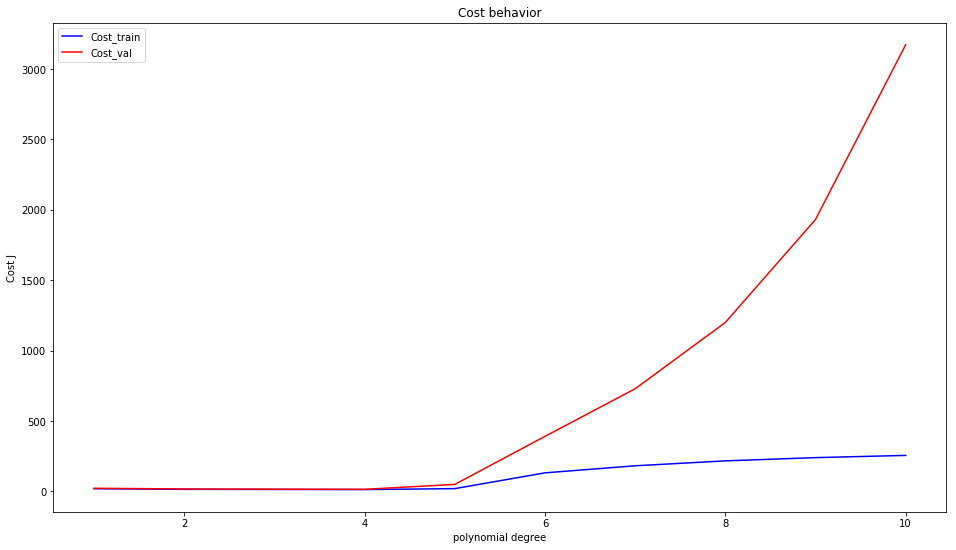

In [11]:
# Plot the convergence graph
plt.figure(figsize=(16,9))
plt.plot([i for i in range(1,11)], costs_t, '-b', label = 'Cost_train')
plt.plot([i for i in range(1,11)], costs_v, '-r', label = 'Cost_val')
plt.xlabel('polynomial degree') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label
plt.title('Cost behavior')
plt.legend()
plt.show()

## We want to minimize both errors, then we choose the 4th degree as the best model.

## Now let's evaluate the chosen model to the increase of the regularization term
## For this purpose, let's introduce the regularized normal equation:
$$\large \theta = (X^TX+E)^{-1}X^Ty $$
## where
$$\large E = \begin{bmatrix}
0 & 0 & \dots & 0\\
0 & \lambda & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & ... & \lambda \\
\end{bmatrix}$$

In [12]:
def regNormalEquation(X, y, lambda_reg):
    m=X.shape[1]
    E = np.identity(m)*lambda_reg
    E[0,0] = 0
    pseudo_inv = np.linalg.pinv(X.T.dot(X) + E)
    product = pseudo_inv.dot(X.T)
    return product.dot(y)

In [18]:
dataframe2 = pd.DataFrame(X_train[:, 1], columns = [VARIABLE])
dataframev2 = pd.DataFrame(X_val[:, 1], columns = [VARIABLE])

X_t4 = np.concatenate([np.ones((X_train.shape[0],1)), polynomial_features(dataframe2, 4).values], axis=1)

X_v4 = np.concatenate([np.ones((X_val.shape[0],1)), polynomial_features(dataframev2, 4).values], axis=1)

regcosts = []
regcosts_v = []
lamb = []
theta_t4 = regNormalEquation(X_t4, y_train, 0)
cost_reg = regCost(theta_t4, X_t4, y_train, 0)
regcosts.append(cost_reg)
cost_reg_v = regCost(theta_t4, X_v4, y_val, 0)
regcosts_v.append(cost_reg_v)
lamb.append(0)
lamb.append(0.01)
while lamb[len(lamb)-1]<11:
    theta_t4 = regNormalEquation(X_t4, y_train, lamb[len(lamb)-1])
    cost_reg = regCost(theta_t4, X_t4, y_train, lamb[len(lamb)-1])
    regcosts.append(cost_reg)
    cost_reg_v = regCost(theta_t4, X_v4, y_val, lamb[len(lamb)-1])
    regcosts_v.append(cost_reg_v)
    lamb.append(lamb[len(lamb)-1]*2)

print(regcosts)
print(regcosts_v)

[12.609790250734594, 12.61108657282577, 12.61238179027853, 12.614968916916139, 12.620129976514356, 12.630399634157765, 12.650731576833058, 12.690585267335386, 12.767198738350713, 12.909116511554275, 13.15481291958373, 13.534241994860249]
[14.337475950012152, 14.339545739980021, 14.341613664090154, 14.345744891884774, 14.353989502681138, 14.370404594198174, 14.402942240640126, 14.466872954383081, 14.590331720647386, 14.820979501186956, 15.226287599913089, 15.867137672474756]


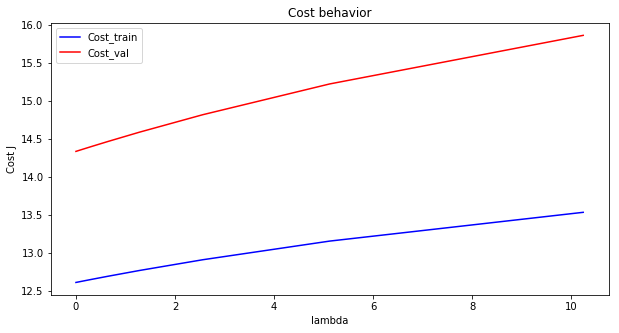

In [19]:
plt.figure(figsize=(10,5))
plt.plot(lamb[:len(lamb)-1], regcosts, '-b', label = 'Cost_train')
plt.plot(lamb[:len(lamb)-1], regcosts_v, '-r', label = 'Cost_val')
plt.xlabel('lambda') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label
#plt.ylim(13, 16)
plt.title('Cost behavior')
plt.legend()
plt.show()

## We want to minimize both errors, then we choose the regularization term equal to 0
## Now let's evaluate the chosen model and the chosen regularization term to the increase of the training set size

In [15]:
X_array = []
y_array = []
leng = []
used_lambda = 0

costs_t = []
costs_v = []
degree=4

for i in range(1,11):
    X_temp = X_train[:int(X_train.shape[0]*(i*0.1))]
    y_temp = y_train[:int(y_train.shape[0]*(i*0.1))]
    dataframe3 = pd.DataFrame(X_temp[:, 1], columns = [VARIABLE])
    dataframev3 = pd.DataFrame(X_val[:, 1], columns = [VARIABLE])
    X_i = np.concatenate([np.ones((X_temp.shape[0],1)), polynomial_features(dataframe3, degree).values], axis=1)
    theta_ne_t = regNormalEquation(X_i, y_temp, used_lambda)
    cost_t = regCost(theta_ne_t, X_i, y_temp, used_lambda)
    costs_t.append(cost_t)
    
    X_iv = np.concatenate([np.ones((X_val.shape[0],1)), polynomial_features(dataframev3, degree).values], axis=1)
    cost_v = regCost(theta_ne_t, X_iv, y_val, used_lambda)
    costs_v.append(cost_v)
    leng.append(X_temp.shape[0])


print(leng)

[30, 60, 90, 121, 151, 181, 212, 242, 272, 303]


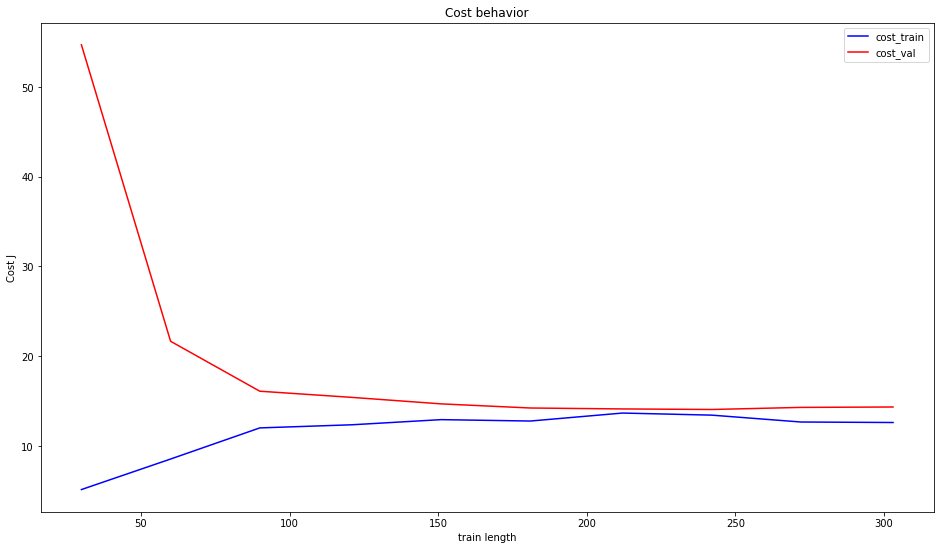

In [17]:
plt.figure(figsize=(16,9))
plt.plot(leng, costs_t, '-b', label = 'cost_train')
plt.plot(leng, costs_v, '-r', label = 'cost_val')


plt.xlabel('train length') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label
plt.title('Cost behavior')
plt.legend()
plt.show()

## This plot shows a high bias problem because there is an high error for both cost functions. Probably the problem is the way we represent the data.